# Image analysis of E.coli growth movie

In [37]:
import numpy as np # For numerics
import glob # For parsing durectories and files
import skimage.io # For basic image processing
import skimage.filters # For filtering images
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plot swag
sns.set(style="darkgrid") # Gray background with white grid
sns.set_context('talk') # Sets default size to the curves and fonts
#display plots next to code
%matplotlib inline 

In [38]:
# Use glob to lacate the images
files = glob.glob('../data/ecoli_growth/ecoli_TRITC_*.tif')
# Sort the files by time step
files.sort()

#Print first entries
files[:5]

['../data/ecoli_growth/ecoli_TRITC_00.tif',
 '../data/ecoli_growth/ecoli_TRITC_01.tif',
 '../data/ecoli_growth/ecoli_TRITC_02.tif',
 '../data/ecoli_growth/ecoli_TRITC_03.tif',
 '../data/ecoli_growth/ecoli_TRITC_04.tif']

In [39]:
# Read files into the memory
im = skimage.io.imread(files[0])

# Print the image
im

array([[207, 205, 205, ..., 205, 205, 206],
       [205, 204, 204, ..., 205, 205, 205],
       [207, 206, 206, ..., 202, 204, 205],
       ...,
       [205, 205, 206, ..., 205, 204, 203],
       [204, 204, 204, ..., 205, 204, 204],
       [204, 204, 205, ..., 205, 203, 203]], dtype=uint16)

### Plotting the image

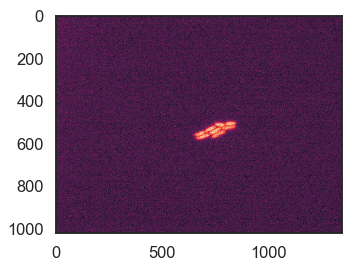

In [40]:
with sns.axes_style('white'):
    plt.imshow(im)


### In order to chose a threshold value, let's plot a histogram

Text(0, 0.5, 'Counts')

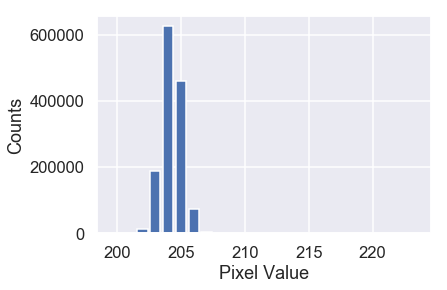

In [41]:
# Generate a histogram
counts, bins = skimage.exposure.histogram(im)

# Plot histogram as a bar plot
plt.bar(bins,counts)

# Label axis
plt.xlabel('Pixel Value')
plt.ylabel('Counts')

### In order to chose a threshold value, let's plot a histogram but now in log scale

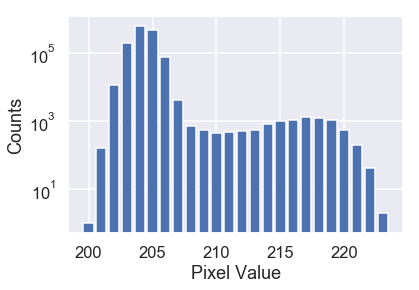

In [42]:
# Generate a histogram
counts, bins = skimage.exposure.histogram(im)

# Plot histogram as a bar plot
plt.bar(bins,counts)

# Label axis
plt.xlabel('Pixel Value')
plt.ylabel('Counts')

# Change scale
plt.yscale('log')

### Choose threshold value and segment image

In [43]:
# Choose threshold
thresh = 210

# Generate threshold image
im_thresh = im >= thresh

im_thresh

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

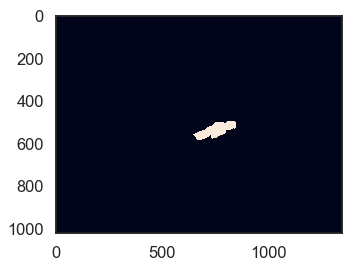

In [44]:
with sns.axes_style('white'):
    plt.imshow(im_thresh)

### Doing this for all images

In [45]:
# Array to store area
A_array = np.zeros(len(files))
# Read files into the memory
for i, file in enumerate(files):
    im = skimage.io.imread(files[i])
    im_thresh = im >= thresh
    A_array[i] = np.sum(im_thresh)

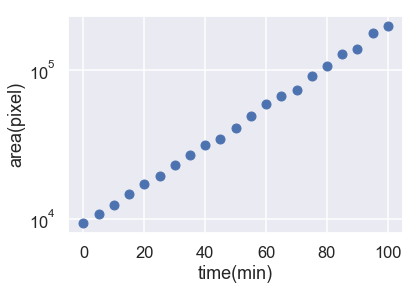

In [46]:
plt.plot(np.arange(len(files)) * 5, A_array, 
        marker = 'o', lw = 0)
# Label axis
plt.xlabel('time(min)')
plt.ylabel('area(pixel)')
plt.yscale('log')

### Minimise the sum of the square of the residue

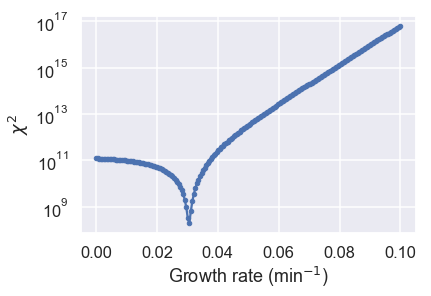

In [47]:
# Define the range of growth rates to evaluate
r_range = np.linspace(0, 0.1, 200)

# Initialise an empty vecrtor to save our chi-square statistics
chi_sq = np.zeros_like(r_range)

# Define time array in minutes
time = np.arange(len(files)) * 5
# Loop through each of the growth rates
for i, r in enumerate(r_range):
    
    # 1. Evaluate the theoretical growth rate
    A_theory = A_array[0] * np.exp(r * time)
    
    # 2. Compute the sum of the square of the residuals
    chi_sq[i] = np.sum((A_array - A_theory)**2)
    
    
# Plot the chi-square statistics
plt.plot(r_range, chi_sq, marker='.')

# Label axis
plt.xlabel(r'Growth rate (min$^{-1}$)')
plt.ylabel(r'$\chi ^2$')
plt.yscale('log')

### Finding the value of $r$ which fits the data the best

In [49]:
# Find the minimum of the chi_sq
min_idx = np.argmin(chi_sq)

# Extract the best growth rate
r_opt = r_range[min_idx]

print('Index of the minumum is' + str(r_opt) + 'min-1')

Index of the minumum is0.030653266331658293min-1


### Comparing with the model data

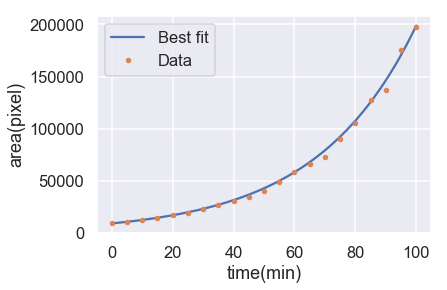

In [53]:
# Comparing best fit
t = np.linspace(0, max(time), 500)
A_model = A_array[0] * np.exp(r_opt * t)

plt.plot(t, A_model, label='Best fit')
plt.plot(time, A_array, '.', label='Data')

# Label axis
plt.xlabel('time(min)')
plt.ylabel('area(pixel)')
plt.legend()